In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [ ]:
# Define the folder path
folder_path = "../results"

# Get the list of .csv files containing "aoxu" keyword
file_list = [file for file in os.listdir(folder_path) if file.endswith(".csv") and "aoxu" in file]
file_list = [file for file in os.listdir(folder_path) if file.endswith(".csv") and "test_1M_aoxu" in file]
# Initialize an empty DataFrame to store the data
df_combined = pd.DataFrame()

# Iterate over each file
for file in file_list:
    # Load the .csv file
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    
    # Extract the required columns
    df_selected = df[['molid', 'Score', df.columns[-1]]]
    if 'molid' not in df_combined.columns:
        df_combined = df_selected
    else:
        # Merge the selected data with the combined DataFrame
        df_combined = pd.merge(df_combined, df_selected, on=['molid', 'Score'], how='outer')

# Display the combined DataFrame
df_combined

In [17]:
df_combined = pd.read_csv('../results/val_10K_results.csv')
df_combined.drop(['RF_pred', 'RF_1M_pred'], inplace=True, axis=1)
df_combined.rename(columns={'score': 'Score'}, inplace=True)
df_combined

,molid,Score,RF_10K_pred,RF_100K_pred,RF_500K_pred
0,EN_m_22bbb_5803X18326__s12876804_s4117038_s-1,-25.632725,-18.984493,-18.626439,-18.626439
1,EN_m_22bbb_5803X18326__s13193988_s6108868_s-1,-23.028124,-19.501194,-18.380566,-18.380566
2,EN_m_22bbb_5803X18326__s16608592_s6174706_s-1,-20.787680,-19.510435,-18.061249,-18.061249
3,EN_m_22bbb_5803X18326__s13776140_s6546426_s-1,-20.353279,-18.632625,-19.757729,-19.757729
4,EN_m_7bmb_867X3692__s15493990_s5992_s-1,-18.782646,-18.509259,-17.183243,-17.183243
...,...,...,...,...,...
9995,EN_m_280130bbb_25554X204__s17874382_s17857256_s-1,-10.929080,-17.470273,-17.511709,-17.511709
9996,EN_m_280130bbb_25554X204__s17874382_s17857498_s-1,-13.383339,-16.798122,-18.192953,-18.192953
9997,EN_m_280130bbb_25554X204__s17875036_s17857562_s-1,-13.114769,-18.071599,-17.780584,-17.780584
9998,EN_m_280130bbb_25554X204__s17875234_s17857358_s-1,-22.011690,-17.063822,-18.266656,-18.266656


## compute the R2 score

In [7]:
from sklearn.metrics import r2_score, explained_variance_score

# Iterate over each column starting from the 3rd column
for column in df_combined.columns[2:]:
    # Compute R^2 score
    r2 = r2_score(df_combined['Score'], df_combined[column])

    # Compute Q^2 score
    q2 = explained_variance_score(df_combined['Score'], df_combined[column])

    print(f"Column: {column}")
    print(f"R^2 Score: {r2}")
    print(f"Q^2 Score: {q2}")
    print()


Column: RF_10K_pred
R^2 Score: -0.059216061263717146
Q^2 Score: -0.03546781320810832

Column: RF_100K_pred
R^2 Score: -0.0726778061964799
Q^2 Score: -0.052293090279962984

Column: RF_1M_pred
R^2 Score: -0.0726778061964799
Q^2 Score: -0.052293090279962984



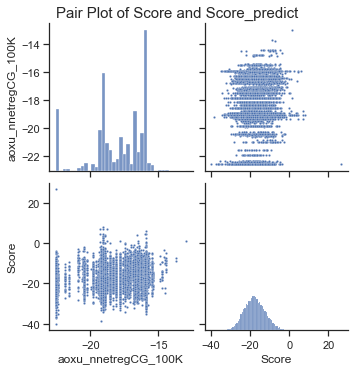

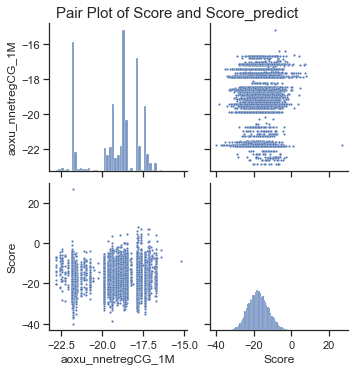

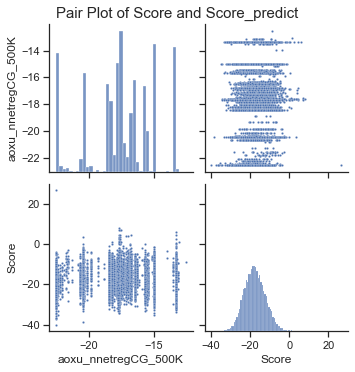

In [11]:
import seaborn as sns
# Iterate over each column starting from the 3rd column
for column in df_combined.columns[2:]:
    # Set the style of the plot
    sns.set(style="ticks")
    pair_plot = sns.pairplot(df_combined, vars=[f'{column}', 'Score'],diag_kind='hist', plot_kws={'s': 5})  # 's' controls the size of the scatter points
    # Set the plot title
    pair_plot.fig.suptitle('Pair Plot of Score and Score_predict', size=15, y=1.02)
    # Save the plot
    plt.savefig(f'./analysis{column}_pairplot.png')
    # plt.show()

### Take the .tab with training set predictions and load into a dataframe

In [12]:
def plot_pairplot(df, column, plot_type='pairplot'):
    # Set the style of the plot
    sns.set(style="ticks")
    if plot_type == 'pairplot':
        pair_plot = sns.pairplot(df, vars=[f'{column}', 'Score'],diag_kind='hist', plot_kws={'s': 5})  # 's' controls the size of the scatter points
        # Set the plot title
        pair_plot.fig.suptitle('Pair Plot of Score and Score_predict', size=15, y=1.02)
    elif plot_type == 'jointplot':
        pair_plot = sns.jointplot(x=f'{column}', y='Score', data=df, kind='reg', height=5)
        pair_plot.fig.suptitle('Joint Plot of Score and Score_predict', size=15, y=1.02)
    
    # Save the plot
    plt.savefig(f'../analysis/{column}_{plot_type}.png')
    # plt.show()

def select_top_n(df, column, n):
    # Sort the DataFrame based on the column
    df_sorted = df.sort_values(by=column, ascending=True)
    # Select the top n rows
    df_top_n = df_sorted.iloc[:n, :]
    return df_top_n

def plot_hist_score(df, n):
    top_score_from_each_file = []
    for column in df.columns[1:]:
        # Sort the DataFrame based on the column
        df_sorted = df.sort_values(by=column, ascending=True)
        # Select the top n rows
        df_top_n = df_sorted.iloc[:n, :]
        # Append the top score to the list
        top_score_from_each_file.append(df_top_n['Score'].values)
    sns.histplot(top_score_from_each_file)

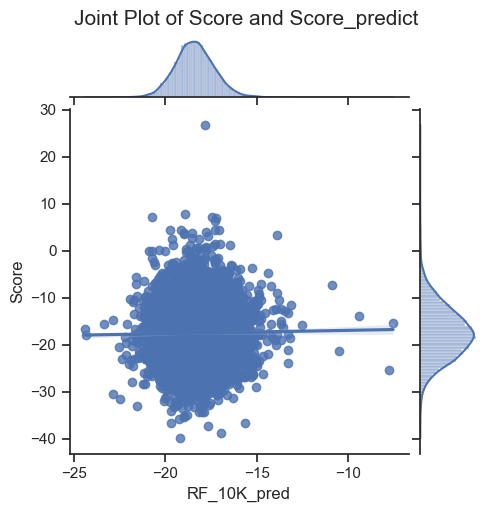

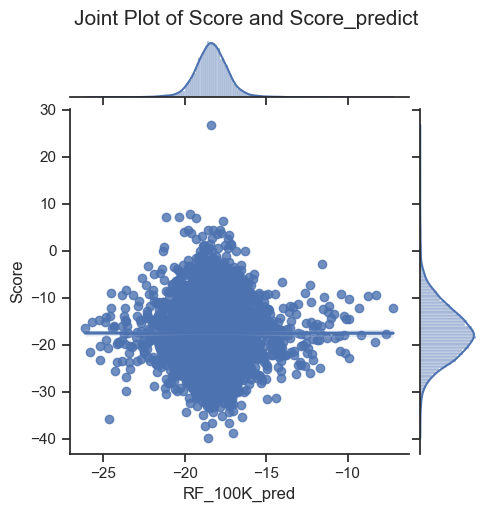

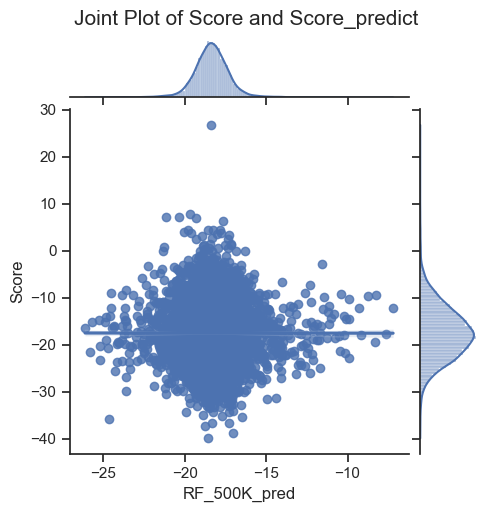

In [19]:
for column in df_combined.columns[2:]:
    plot_pairplot(df_combined, column, plot_type='jointplot')

In [14]:
top_molecules = df_combined.sort_values('Score', ascending=True).iloc[:10]
top_molecules

,molid,Score,RF_10K_pred,RF_100K_pred,RF_1M_pred
133,EN_m_22bbb_5803X18326__s14772360_s12889990_s-1,-39.941085,-19.226570,-18.543979,-18.543979
6066,EN_m_527dbb_843X12060__s4059160_s14936312_s-1,-38.703960,-16.973682,-17.053649,-17.053649
758,EN_m_22bbb_5803X18326__s20821052_s11723338_s-1,-37.287924,-17.665629,-18.721919,-18.721919
789,EN_m_22bbb_5803X18326__s20821052_s60236_s-1,-36.611349,-19.705071,-17.301809,-17.301809
780,EN_m_22bbb_5803X18326__s20821052_s300374_s-1,-36.591679,-15.668508,-18.296789,-18.296789
785,EN_m_22bbb_5803X18326__s20821052_s16946146_s-1,-35.915964,-19.241459,-24.621746,-24.621746
774,EN_m_22bbb_5803X18326__s20821052_s17830656_s-1,-35.418796,-18.963113,-16.479262,-16.479262
4636,EN_m_27bbd_10224X2510__s20842774_s21039156_s-1,-35.094195,-18.974434,-17.691892,-17.691892
770,EN_m_22bbb_5803X18326__s20821052_s14033842_s-1,-34.866010,-18.828734,-18.860732,-18.860732
775,EN_m_22bbb_5803X18326__s20821052_s8698604_s-1,-34.329340,-18.158973,-18.280196,-18.280196


In [18]:
df_combined.describe()

,Score,RF_10K_pred,RF_100K_pred,RF_500K_pred
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,-17.541456,-18.387194,-18.325016,-18.325016
std,5.488349,1.114042,1.252124,1.252124
min,-39.941085,-24.397076,-26.112190,-26.112190
25%,-21.353589,-19.094432,-18.970246,-18.970246
50%,-17.733554,-18.422903,-18.347580,-18.347580
75%,-13.972536,-17.707946,-17.720619,-17.720619
max,26.725512,-7.554257,-7.201571,-7.201571


<AxesSubplot:xlabel='Score', ylabel='aoxu_nnetregCG_1M'>

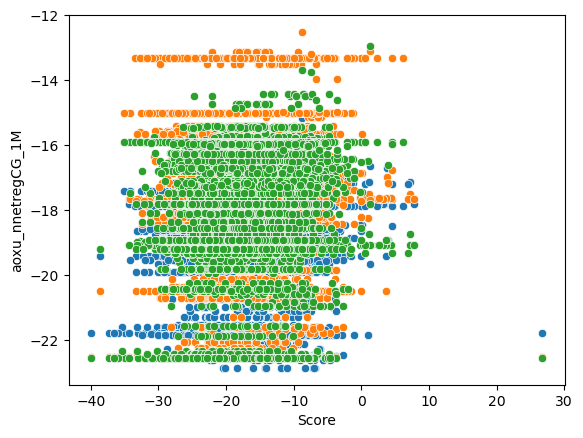

In [38]:
sns.scatterplot(data=df_combined, x='Score', y='aoxu_nnetregCG_1M')
sns.scatterplot(data=df_combined, x='Score', y='aoxu_nnetregCG_500K')
sns.scatterplot(data=df_combined, x='Score', y='aoxu_nnetregCG_100K')

In [29]:
top_score_df = pd.DataFrame()
for column in df_combined.columns[1:]:
    # Sort the DataFrame based on the column
    df_top_n = select_top_n(df_combined, column, 100)
    top_score_df[column] = df_top_n['Score'].values


In [11]:
top_score_df

,Score,aoxu_nnetregCG_100K,aoxu_nnetregCG_1M,aoxu_nnetregCG_500K
0,-39.94,-20.34,-11.860,-25.63
1,-38.70,-18.90,-7.144,-31.64
2,-37.29,-27.65,-18.380,-22.63
3,-36.61,-16.96,-20.450,-18.78
4,-36.59,-17.67,-10.920,-15.66
...,...,...,...,...
95,-29.52,-18.07,-25.600,-24.58
96,-29.48,-17.47,-22.760,-20.00
97,-29.46,-18.81,-25.530,-18.70
98,-29.43,-23.34,-5.453,-21.80


In [27]:
# Sort the DataFrame based on the column
column = "RF_10K_pred"
n=100
df_sorted = df_combined.sort_values(by=column, ascending=True)
# Select the top n rows
# df_combined.describe()
df_top_n = df_sorted.iloc[:n, :]
df_top_n.describe()

,Score,RF_10K_pred,RF_100K_pred,RF_500K_pred
count,100.000000,100.000000,100.000000,100.000000
mean,-17.876589,-21.437902,-18.260977,-18.260977
std,5.526923,0.646788,1.655888,1.655888
min,-33.157467,-24.397076,-22.250054,-22.250054
25%,-21.405226,-21.623199,-19.076309,-19.076309
50%,-17.784434,-21.204543,-18.474448,-18.474448
75%,-13.994016,-21.014009,-17.835487,-17.835487
max,-5.654288,-20.900818,-8.295895,-8.295895


In [30]:
select_top_n(df_combined, 'Score', 10)

,molid,Score,RF_10K_pred,RF_100K_pred,RF_500K_pred
133,EN_m_22bbb_5803X18326__s14772360_s12889990_s-1,-39.941085,-19.226570,-18.543979,-18.543979
6066,EN_m_527dbb_843X12060__s4059160_s14936312_s-1,-38.703960,-16.973682,-17.053649,-17.053649
758,EN_m_22bbb_5803X18326__s20821052_s11723338_s-1,-37.287924,-17.665629,-18.721919,-18.721919
789,EN_m_22bbb_5803X18326__s20821052_s60236_s-1,-36.611349,-19.705071,-17.301809,-17.301809
780,EN_m_22bbb_5803X18326__s20821052_s300374_s-1,-36.591679,-15.668508,-18.296789,-18.296789
785,EN_m_22bbb_5803X18326__s20821052_s16946146_s-1,-35.915964,-19.241459,-24.621746,-24.621746
774,EN_m_22bbb_5803X18326__s20821052_s17830656_s-1,-35.418796,-18.963113,-16.479262,-16.479262
4636,EN_m_27bbd_10224X2510__s20842774_s21039156_s-1,-35.094195,-18.974434,-17.691892,-17.691892
770,EN_m_22bbb_5803X18326__s20821052_s14033842_s-1,-34.866010,-18.828734,-18.860732,-18.860732
775,EN_m_22bbb_5803X18326__s20821052_s8698604_s-1,-34.329340,-18.158973,-18.280196,-18.280196


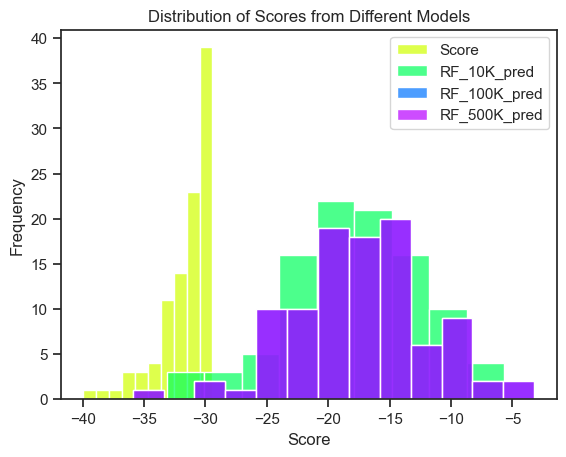

In [31]:
colors = sns.color_palette('hsv', len(top_score_df.columns))  # Generates distinct colors
for i, column in enumerate(top_score_df.columns):
    sns.histplot(top_score_df[column], kde=False, color=colors[i], label=column, alpha=0.7)

plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores from Different Models')
plt.show()

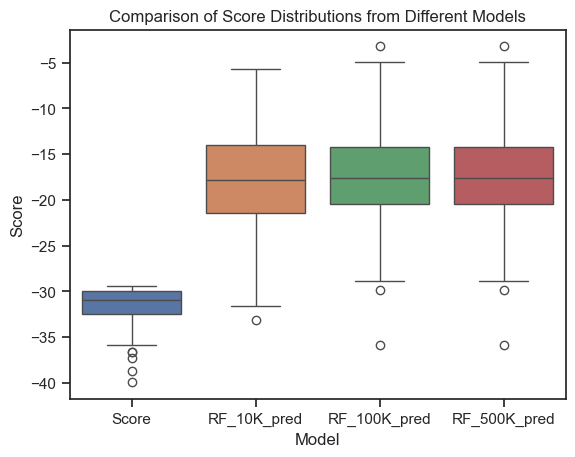

In [36]:
sns.boxplot(data=top_score_df)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Score Distributions from Different Models')
plt.show()


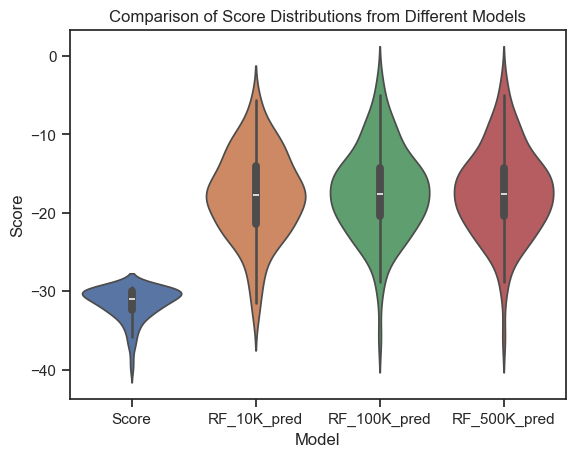

In [37]:
sns.violinplot(data=top_score_df)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Score Distributions from Different Models')
plt.show()

## Compute the percentage of top molecules found 

In [21]:
n = 1000
top_n_by_score = df_combined.sort_values(by='Score', ascending=True).head(n)
top_n_by_score

,molid,Score,RF_10K_pred,RF_100K_pred,RF_500K_pred
133,EN_m_22bbb_5803X18326__s14772360_s12889990_s-1,-39.941085,-19.226570,-18.543979,-18.543979
6066,EN_m_527dbb_843X12060__s4059160_s14936312_s-1,-38.703960,-16.973682,-17.053649,-17.053649
758,EN_m_22bbb_5803X18326__s20821052_s11723338_s-1,-37.287924,-17.665629,-18.721919,-18.721919
789,EN_m_22bbb_5803X18326__s20821052_s60236_s-1,-36.611349,-19.705071,-17.301809,-17.301809
780,EN_m_22bbb_5803X18326__s20821052_s300374_s-1,-36.591679,-15.668508,-18.296789,-18.296789
...,...,...,...,...,...
9400,EN_m_271949aba_5745X4511__s21037632_s12642370_s-1,-24.325562,-16.967406,-17.478618,-17.478618
208,EN_m_4dba_304X4623__s2391612_s14600352_s-1,-24.324604,-18.791633,-20.455993,-20.455993
1765,EN_m_11bbb_6602X10262__s51945_s11400096_s-1,-24.323412,-18.074631,-19.114658,-19.114658
4989,EN_m_40bba_15620X2221__s16737370_s13206334_s-1,-24.319480,-19.353143,-18.980514,-18.980514


In [22]:
prediction_columns = ['aoxu_nnetregCG_100K', 'aoxu_nnetregCG_1M', 'aoxu_nnetregCG_500K']
prediction_columns = ['RF_10K_pred', 'RF_100K_pred', 'RF_500K_pred']
top_n_by_predictions = {col: df_combined.sort_values(by=col, ascending=True).head(n) for col in prediction_columns}

In [23]:
true_top_n_molids = set(top_n_by_score['molid'])

intersections = {col: true_top_n_molids.intersection(set(top_n_df['molid'])) 
                 for col, top_n_df in top_n_by_predictions.items()}


In [24]:
for col, intersection in intersections.items():
    print(f"Intersection for {col}: {intersection}")
    print(f"Number of molecules in intersection for {col}: {len(intersection)}")

Intersection for RF_10K_pred: {'EN_m_22cbb_5803X533__s13570848_s337064_s-1', 'EN_m_11bcb_4522X8531__s153377_s147684_s-1', 'EN_m_270004bca_6713X2697__s16923092_s15765802_s-1', 'EN_m_22bbb_5803X18326__s58088_s9105046_s-1', 'EN_m_22bbe_1101X18326__s16735524_s467374_s-1', 'EN_m_11bbc_4643X10267__s4840330_s9787962_s-1', 'EN_m_271949aba_5745X4511__s10838366_s10847334_s-1', 'EN_m_270302bba_830X1810__s8322724_s8324188_s-1', 'EN_m_27bbd_10224X2510__s14036686_s12806264_s-1', 'EN_m_6bba_1188X1718__s8201464_s13040286_s-1', 'EN_m_22bbb_5803X18326__s13206568_s300366_s-1', 'EN_m_27bbd_10224X2510__s13438768_s14903918_s-1', 'EN_m_2718bba_16504X4183__s16483338_s17796296_s-1', 'EN_m_527bbb_13275X12060__s6548234_s16735320_s-1', 'EN_m_2740bbb_959X9971__s16608624_s1020356_s-1', 'EN_m_2718bba_16504X4183__s20807564_s1029462_s-1', 'EN_m_22bbb_5803X18326__s466336_s60468_s-1', 'EN_m_1458beb_401X4378__s10684034_s484426_s-1', 'EN_m_22bbg_14175X18811__s821066_s3173336_s-1', 'EN_m_22bbc_968X18326__s20975988_s2140683

## Compare the molecule similaries 

In [34]:
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

sdf_file = '../../data/selected_19.sdf'
supplier = Chem.SDMolSupplier(sdf_file)
molecules = [mol for mol in supplier if mol is not None]

fingerprints = [rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) for mol in molecules]

num_molecules = len(fingerprints)
similarity_matrix = [[0] * num_molecules for _ in range(num_molecules)]

for i in range(num_molecules):
    for j in range(i, num_molecules):
        similarity = DataStructs.TanimotoSimilarity(fingerprints[i], fingerprints[j])
        similarity_matrix[i][j] = similarity
        similarity_matrix[j][i] = similarity  # Symmetric matrix

(297, 297)


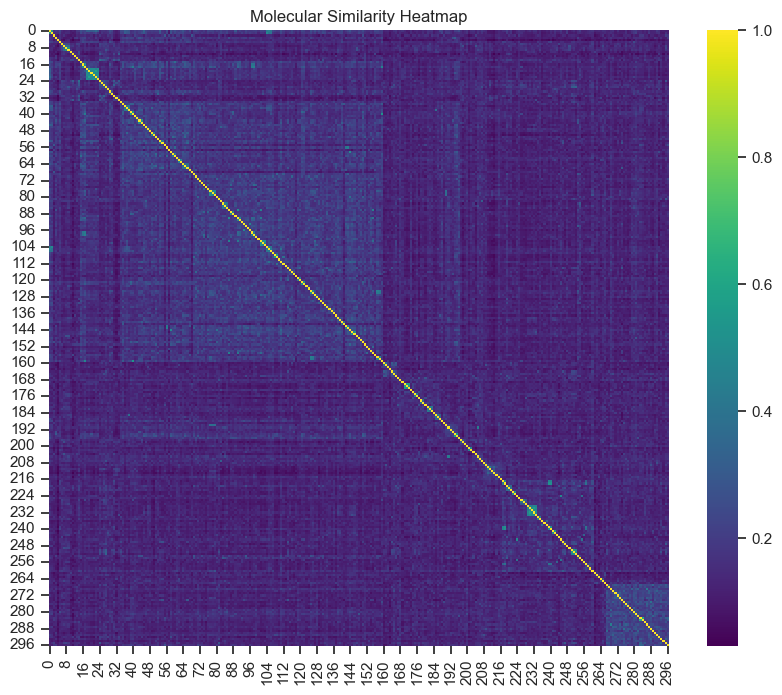

In [35]:
similarity_df = pd.DataFrame(similarity_matrix)
print(similarity_df.shape)
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(similarity_df, annot=False, cmap='viridis')
plt.title('Molecular Similarity Heatmap')
plt.show()

In [56]:
similarity_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.449759,0.468666,0.457782,0.418403,0.466678,0.466103,0.446421,0.470461,0.439916,0.476662,0.448636,0.449472
std,0.183295,0.172268,0.174085,0.186744,0.180135,0.170774,0.182239,0.177469,0.182003,0.168148,0.183910,0.178394
min,0.338983,0.362069,0.362069,0.305085,0.339286,0.379310,0.305085,0.345455,0.322034,0.400000,0.344828,0.333333
25%,0.362013,0.406433,0.392241,0.343912,0.370536,0.395628,0.353156,0.377273,0.347246,0.413023,0.354668,0.374470
50%,0.387931,0.420629,0.412795,0.367475,0.423077,0.419086,0.407407,0.431373,0.400000,0.422065,0.383333,0.405172
75%,0.435464,0.432620,0.425151,0.390179,0.448529,0.436364,0.431689,0.454082,0.427288,0.432620,0.426724,0.442982
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
